In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  


In [3]:
data = pd.read_csv('/Users/kimminji/Downloads/SeoulBikeData.csv',encoding='cp949')

In [4]:
data

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Date 날짜 : Datetype

Rented Bike Count 자전거 대여량 : Numeric

Hour 시간 : Numeric

Temperature 기온 : Numeric

Humidity 습도 : Numeric

Wind speed 풍량 : Numeric

Dew point temperature 이슬점 : Numeric

Visibility 시야거리 : Numeric

Solar Radiation 자외선 : Numeric

Rainfall 강우량 : Numeric

Snowfall 강설량 : Numeric

Seasons 계절 : Spring, Summer, Autumn, Winter

Holiday 휴일 유무 : Holiday or No Holiday

Funtional day : Yes or No

* 종속변수:  Rented Bike Count
* 시간 : Hour
* 날씨 관련 : Temperature,Humidity,Wind speed,Dew point temperature,Visibility,Rainfall,Snowfall
* 계절별 : Seasons (이것도 날씨랑 관련있긴 함).Date 
* 휴무 유무 : Holiday, Funtional day

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
data.isna().sum(axis=0).sort_values() #결측값 없음

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [9]:
data[data.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [10]:
data.corr()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(캜),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(캜),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

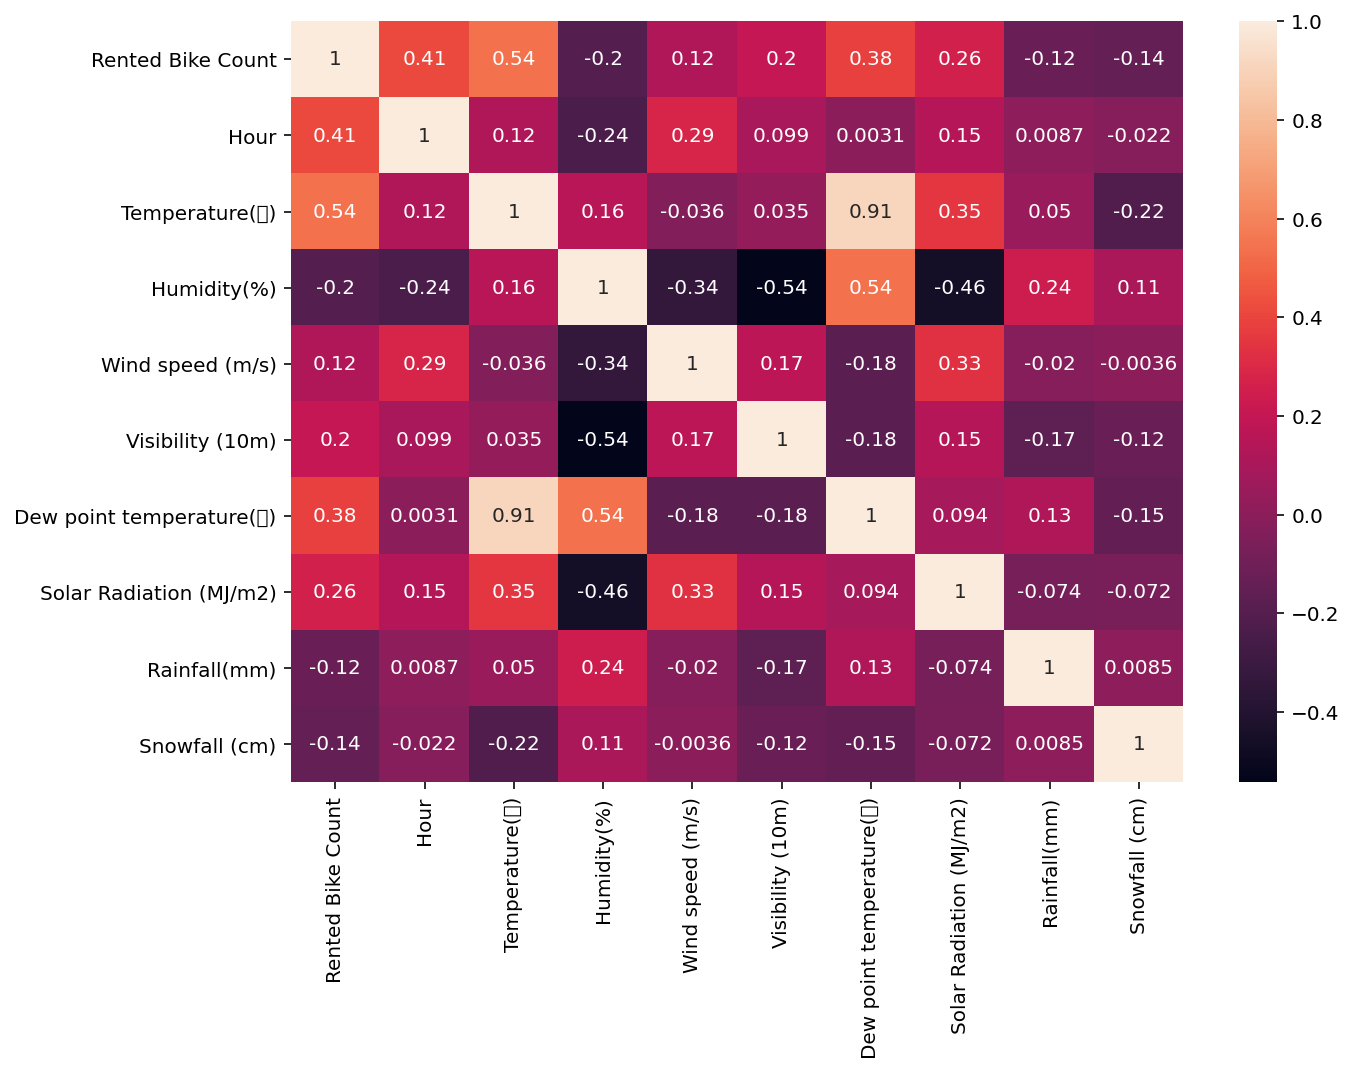

In [11]:
plt.figure(figsize=(10,7)) 
sns.heatmap(data.corr(),annot = True)

# 종속변수 Rented Bike Count

In [12]:
data['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Count'>

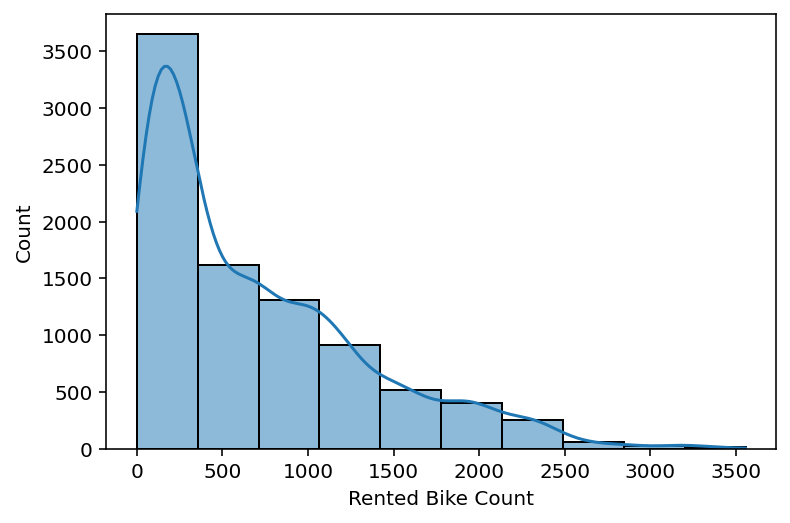

In [13]:
sns.histplot(data['Rented Bike Count'], bins=10, kde=True) 

In [14]:
data['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

## Hour
* 시간에 따른 자건거 대여량

8시 18시 이용량이 많다 (아침 저녁 유동인구가 많은 시간대)

In [15]:
data['Hour'].describe()  #0부터 23

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

<AxesSubplot:xlabel='Hour', ylabel='Count'>

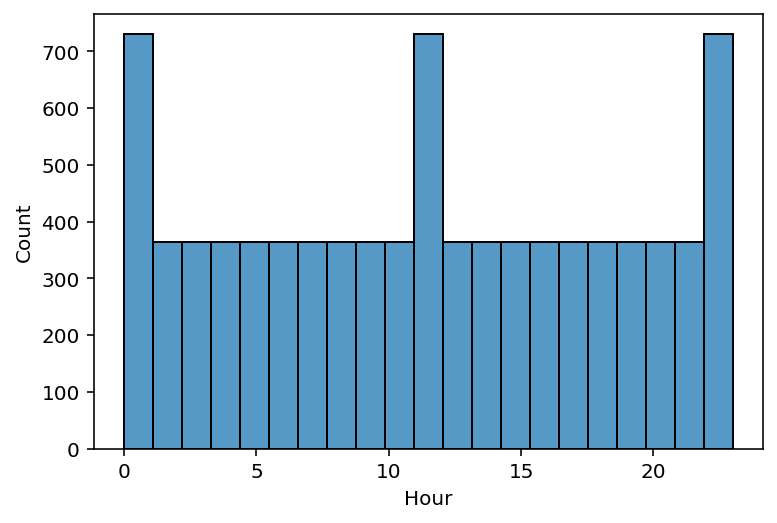

In [16]:
sns.histplot(data['Hour']) 

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

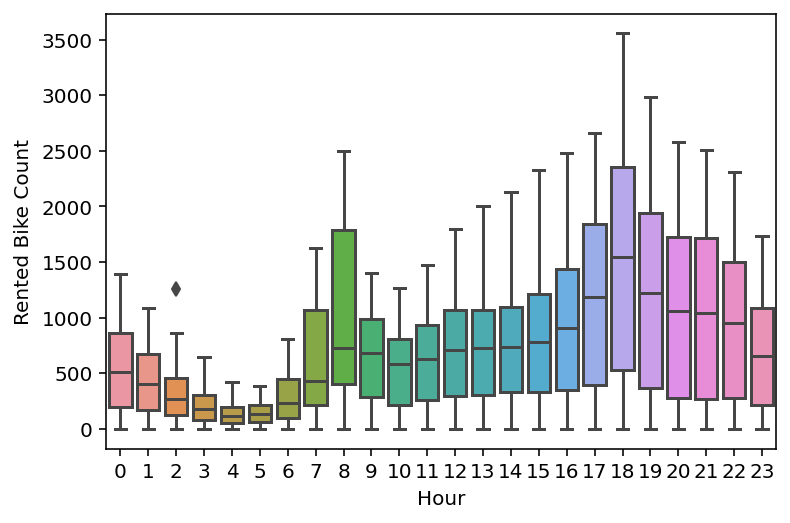

In [17]:
sns.boxplot(x = 'Hour',y='Rented Bike Count',data = data) 

In [18]:
data.groupby('Hour')['Rented Bike Count'].mean().sort_values() 

Hour
4      132.591781
5      139.082192
3      203.331507
6      287.564384
2      301.630137
1      426.183562
10     527.821918
0      541.460274
11     600.852055
7      606.005479
9      645.983562
23     671.126027
12     699.441096
13     733.246575
14     758.824658
15     829.186301
22     922.797260
16     930.621918
8     1015.701370
21    1031.449315
20    1068.964384
17    1138.509589
19    1195.147945
18    1502.926027
Name: Rented Bike Count, dtype: float64

## Temperature

약 20도에서 30도 사이에 많이 대여한다

In [19]:
data['Temperature(캜)'].describe()

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(캜), dtype: float64

<AxesSubplot:xlabel='Temperature(캜)', ylabel='Count'>

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0, flags=flags)


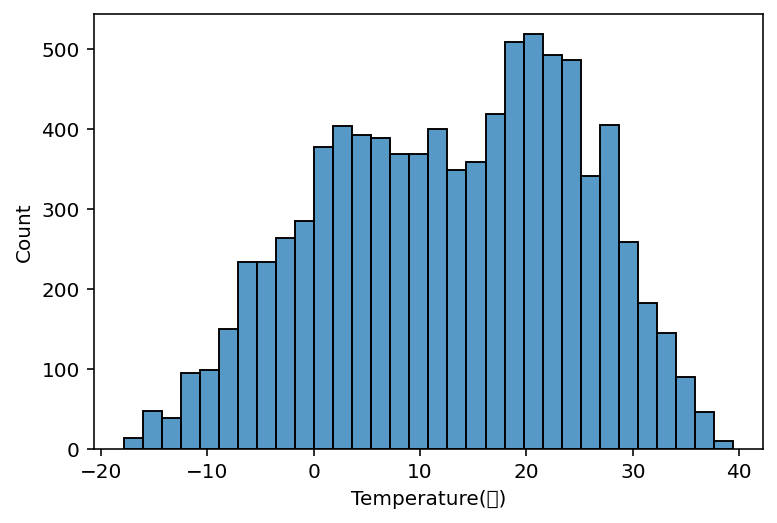

In [20]:
sns.histplot(data['Temperature(캜)'])

<AxesSubplot:xlabel='Temperature(캜)', ylabel='Rented Bike Count'>

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0, flags=flags)


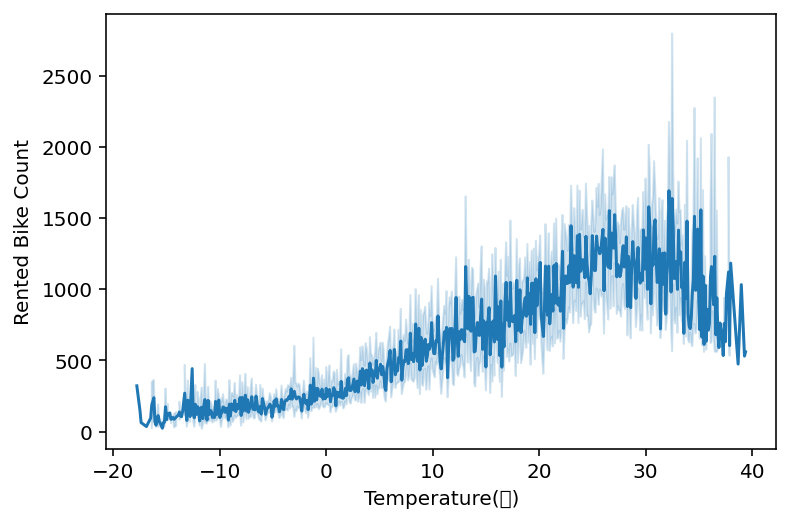

In [21]:
sns.lineplot(x = 'Temperature(캜)',y='Rented Bike Count',data = data)

<AxesSubplot:xlabel='Temperature(캜)', ylabel='Rented Bike Count'>

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0, flags=flags)


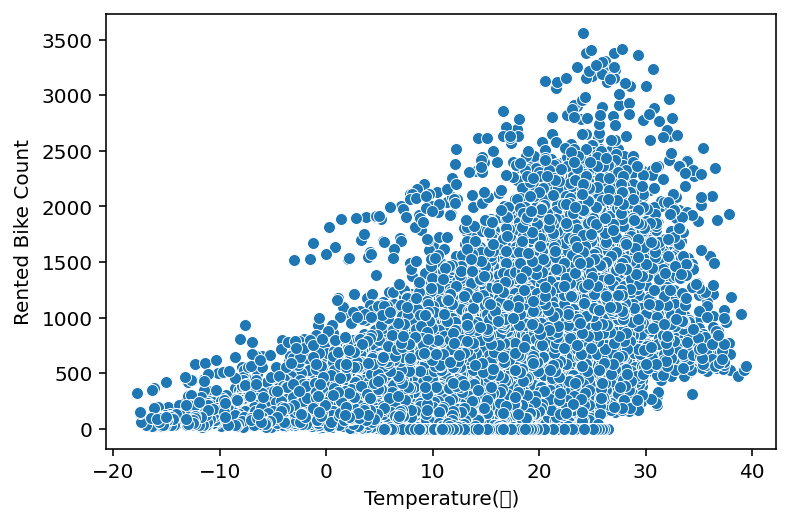

In [22]:
sns.scatterplot(x = 'Temperature(캜)',y='Rented Bike Count',data = data)

## Humidity

습도 50~ 60 사이에 사람들이 많이 이용

In [23]:
data['Humidity(%)'].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity(%), dtype: float64

<AxesSubplot:xlabel='Humidity(%)', ylabel='Count'>

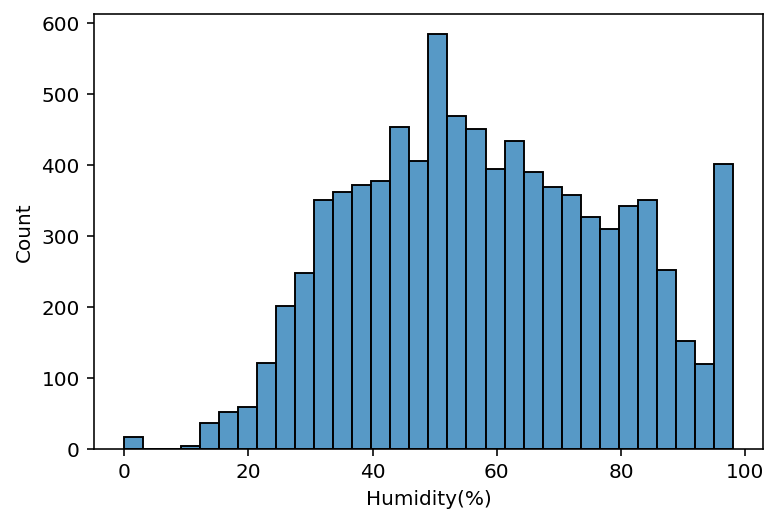

In [24]:
sns.histplot(data['Humidity(%)'])

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

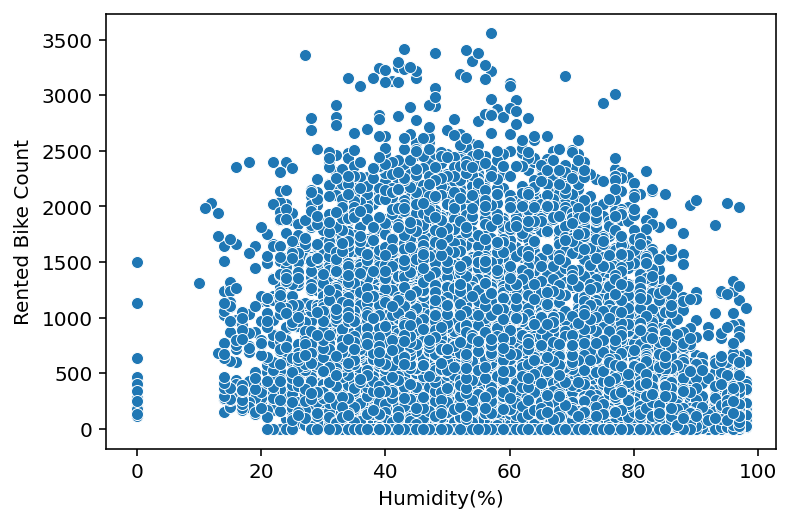

In [26]:
sns.scatterplot(x='Humidity(%)',y='Rented Bike Count',data=data)

## Wind Speed

주로 풍속 4m/s 이하에서 많이 이용

<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Count'>

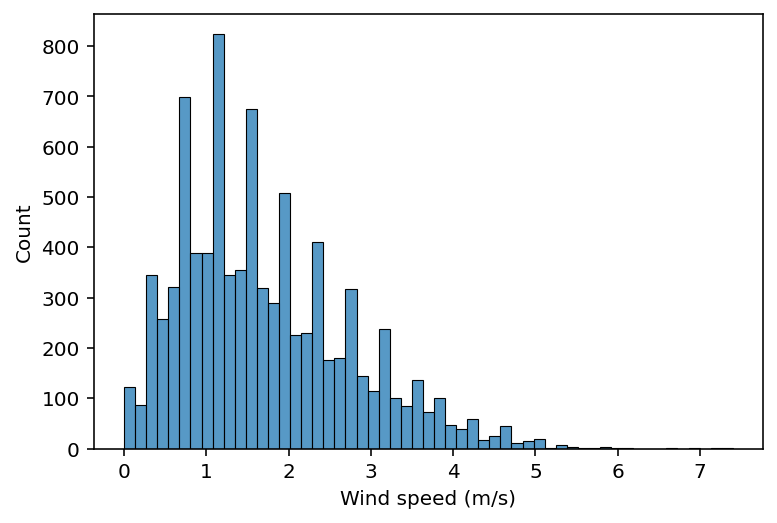

In [27]:
sns.histplot(data['Wind speed (m/s)'])

<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

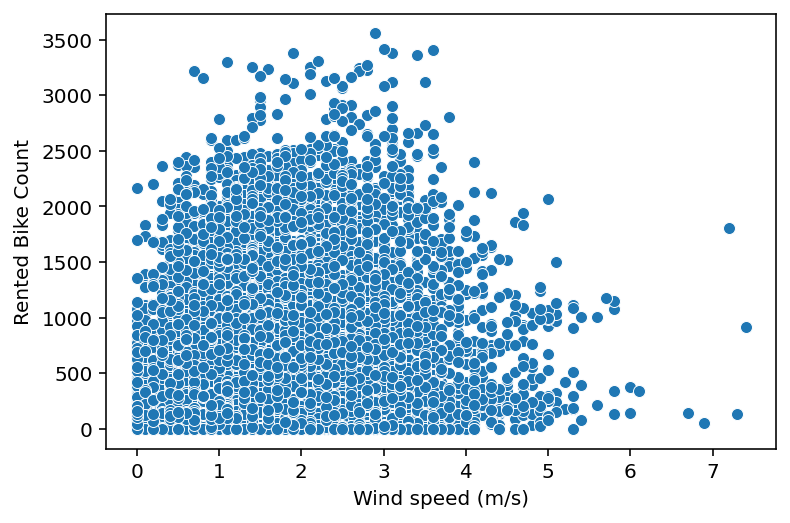

In [28]:
sns.scatterplot(x='Wind speed (m/s)',y='Rented Bike Count',data=data)

## Visibility 

가시거리가 좋을 수록 대여량 증가

In [29]:
data['Visibility (10m)'].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Count'>

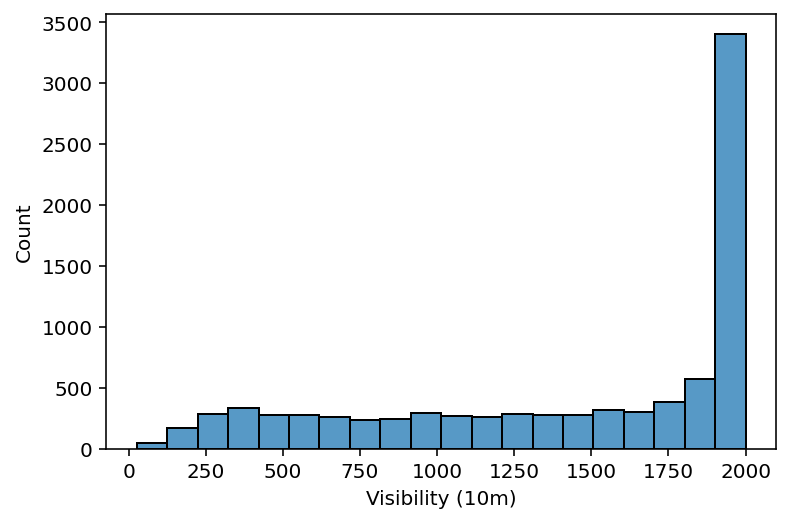

In [30]:
sns.histplot(data['Visibility (10m)'])

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

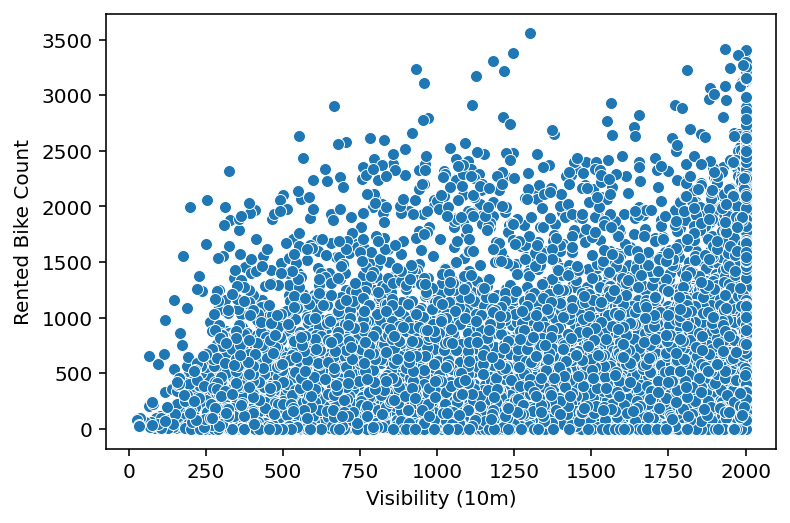

In [31]:
sns.scatterplot(x='Visibility (10m)',y='Rented Bike Count',data=data)

## Dew point temperature

이슬점 온도가 10~20사이 일 때 이용량 많음

이슬점 온도가 올라갈수록 이용량 증가?

<AxesSubplot:xlabel='Dew point temperature(캜)', ylabel='Count'>

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0, flags=flags)


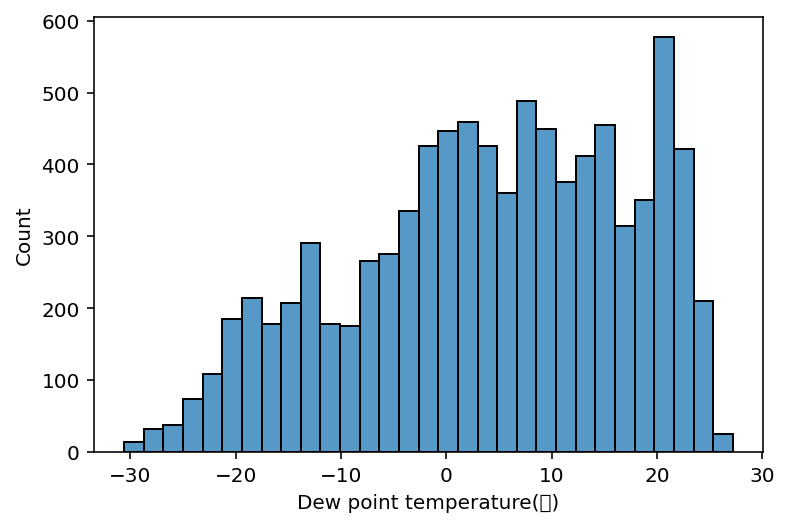

In [32]:
sns.histplot(data['Dew point temperature(캜)'])

<AxesSubplot:xlabel='Dew point temperature(캜)', ylabel='Rented Bike Count'>

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52892 missing from current font.
  font.set_text(s, 0, flags=flags)


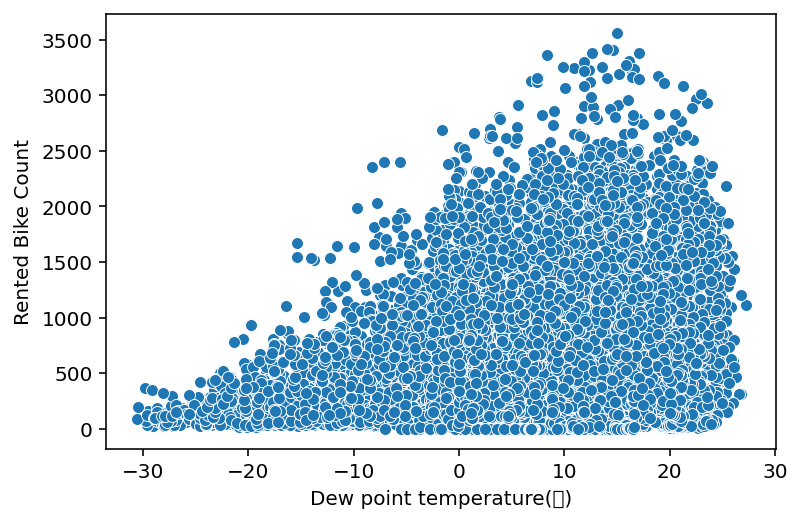

In [33]:
sns.scatterplot(x='Dew point temperature(캜)',y='Rented Bike Count',data=data)

## Solar Radiation
다른 변수에 비해 자전거 대여량 변화가 크지는 않다

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Count'>

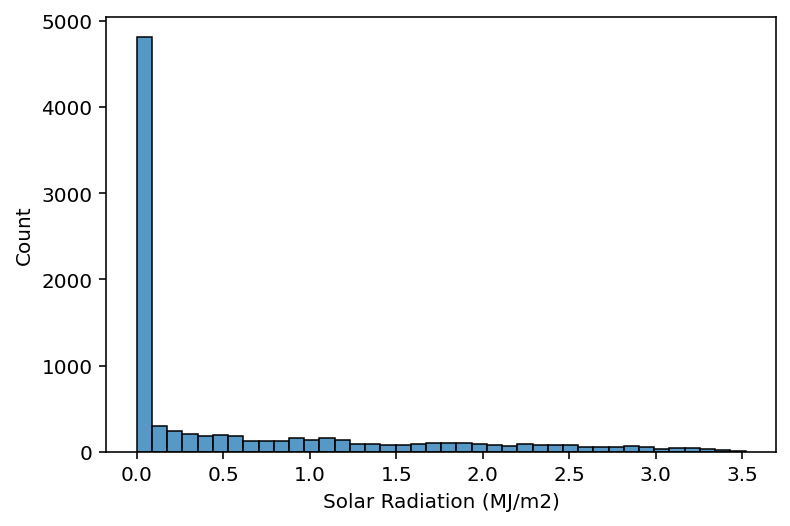

In [34]:
sns.histplot(data['Solar Radiation (MJ/m2)'])

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

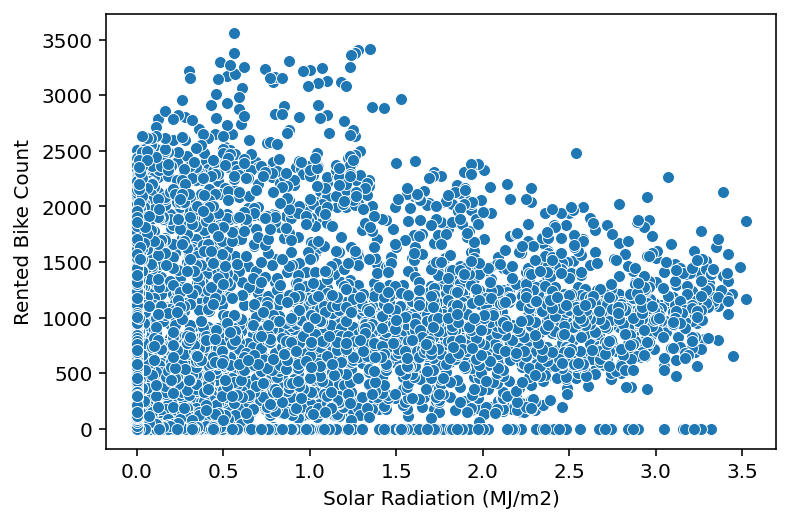

In [35]:
sns.scatterplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=data)

In [36]:
bins = pd.cut(data['Solar Radiation (MJ/m2)'], bins=5)

# 각 구간별 'Rented Bike Count'의 평균 계산
data.groupby(bins)['Rented Bike Count'].mean()



Solar Radiation (MJ/m2)
(-0.00352, 0.704]     603.026176
(0.704, 1.408]        932.598410
(1.408, 2.112]        951.937053
(2.112, 2.816]        945.116788
(2.816, 3.52]        1056.242857
Name: Rented Bike Count, dtype: float64

# Rainfall/Snowfall

주로 강수량과 눈이 적을 때 이용한다

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Count'>

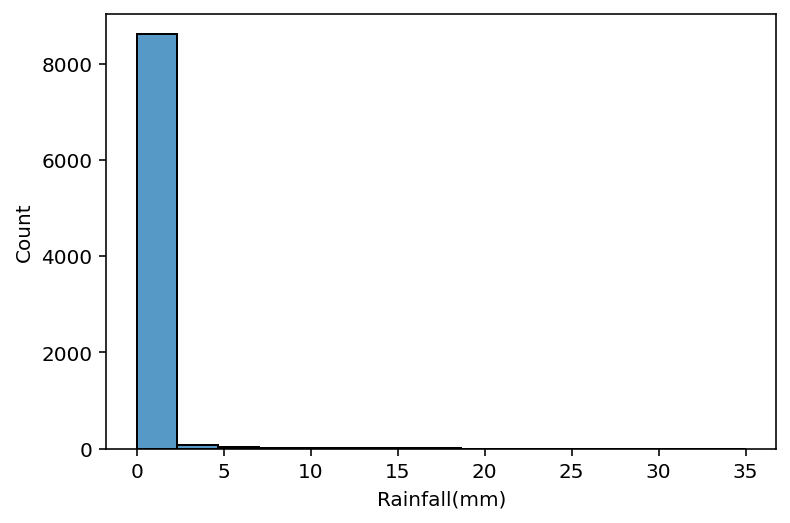

In [37]:
sns.histplot(data['Rainfall(mm)'])

In [38]:
bins = pd.cut(data['Rainfall(mm)'], bins=5)
bins.value_counts().sort_index()


(-0.035, 7.0]    8719
(7.0, 14.0]        27
(14.0, 21.0]       10
(21.0, 28.0]        2
(28.0, 35.0]        2
Name: Rainfall(mm), dtype: int64

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Count'>

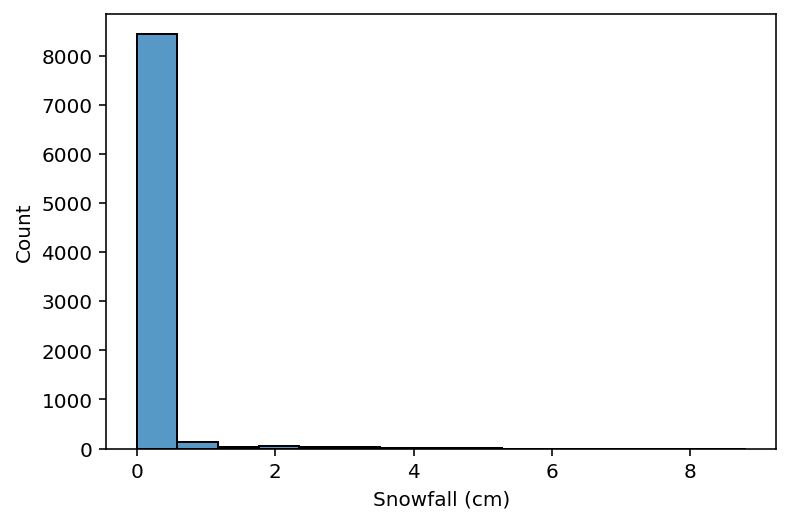

In [39]:
sns.histplot(data['Snowfall (cm)'])

In [40]:
bins = pd.cut(data['Snowfall (cm)'], bins=5)
bins.value_counts().sort_index()

(-0.0088, 1.76]    8612
(1.76, 3.52]        118
(3.52, 5.28]         25
(5.28, 7.04]          2
(7.04, 8.8]           3
Name: Snowfall (cm), dtype: int64

## Seasons
여름 > 가을 > 봄 > 겨울 순으로 대여량이 많았다

In [41]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [42]:
data.groupby('Seasons')['Rented Bike Count'].mean() #각 계절의 평균 자전거 대여량

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

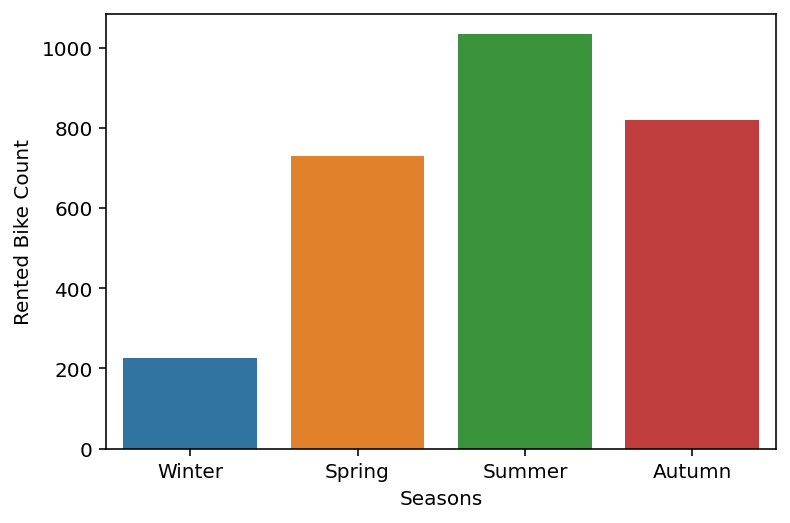

In [43]:
sns.barplot(x='Seasons', y='Rented Bike Count', data=data, ci=None)

## Holiday

홀리데이 아닌 날 대여량이 더 많다

In [44]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

<AxesSubplot:xlabel='Holiday', ylabel='Count'>

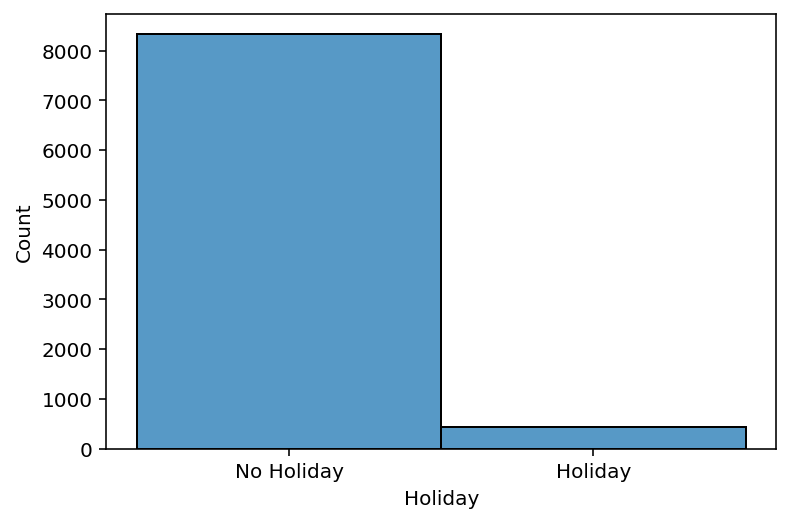

In [45]:
sns.histplot(data['Holiday'])

In [46]:
data.groupby('Holiday')['Rented Bike Count'].mean() #홀리데이 유무 별 대여량 평균

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

## Functioning Day

주로 근무일??에 이용한다

In [47]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

<AxesSubplot:xlabel='Functioning Day', ylabel='Count'>

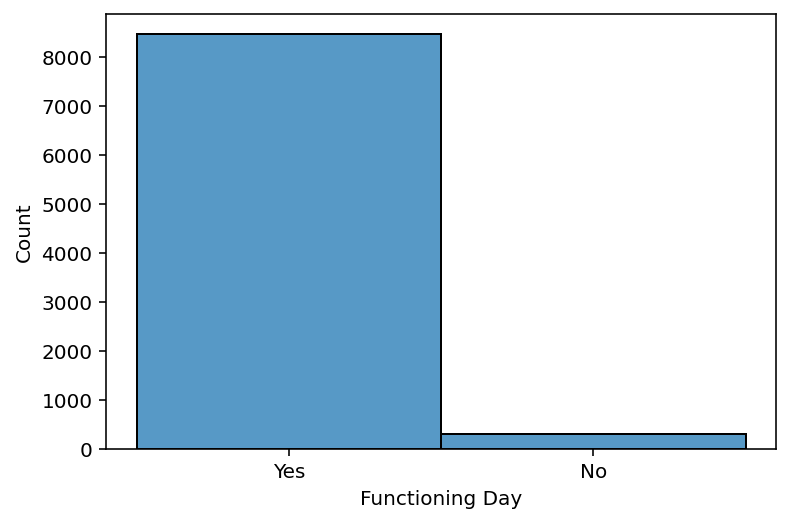

In [48]:
sns.histplot(data['Functioning Day'])

In [49]:
data.groupby('Functioning Day')['Rented Bike Count'].mean()

Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64

## Date
4월부터 10월까지 이용량이 많다 
6월이 가장 많다

In [50]:
data['Date'].describe()

count           8760
unique           365
top       01/12/2017
freq              24
Name: Date, dtype: object

In [51]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
print(data['Date'].describe())

count                    8760
unique                    365
top       2017-12-01 00:00:00
freq                       24
first     2017-12-01 00:00:00
last      2018-11-30 00:00:00
Name: Date, dtype: object


<ipython-input-51-36b34176e622>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data['Date'].describe())


In [52]:
monthly_rented_bike_count = data.groupby(data['Date'].dt.to_period("M"))['Rented Bike Count'].mean()
monthly_rented_bike_count

Date
2017-12     249.099462
2018-01     201.620968
2018-02     225.941964
2018-03     511.551075
2018-04     728.093056
2018-05     950.387097
2018-06    1245.676389
2018-07     987.177419
2018-08     876.192204
2018-09     935.572222
2018-10     874.563172
2018-11     646.826389
Freq: M, Name: Rented Bike Count, dtype: float64

관심있는 주제: 게임 데이터 승률 예측 또는 전략 짜기

이유: 이전에 게임 데이터를 분석하면서 아쉬웠던 부분들을 보완해서 다시 한번더 분석해 보고 싶어서